#  Mount Fuji Paper Folding Problem

## 1. Goal
This assignment requires learners to:
- Test basic programming skills
- Develop the ability to incorporate mathematical formulas into programs

## 2. Problem Statement
This assignment extends the paper-folding problem. The task is to determine how many folds are required to exceed a given height and to compute the length of paper required to achieve those folds.

### Thickness Formula
For a sheet with initial thickness \( t_0 \), the thickness after \( n \) folds is:
\(
t_n = t_0 \times 2^n
\)

Use \( t_0 = 0.00008 \) meters (typical copy paper).


## 3. Question 1 - Minimal Folds to Surpass Mount Fuji
This assignment requires computing the **minimum** number of folds needed to exceed Mount Fuji (3,776 m) using iterative logic.

In [ ]:
# Iterative approach to find minimal folds to exceed Mount Fuji
T0 = 0.00008         # initial thickness in meters
FUJI_M = 3776        # Mount Fuji height in meters

n = 0
thickness = T0
while thickness <= FUJI_M:
    thickness *= 2
    n += 1

print("Minimum folds to exceed Mount Fuji:", n)
print("Thickness after {} folds: {:.2f} m".format(n, thickness))
print("Thickness after {} folds: {:.2f} km".format(n, thickness / 1000))

Minimum folds to exceed Mount Fuji: 26
Thickness after 26 folds: 5368.71 m
Thickness after 26 folds: 5.37 km


## 4. Question 2 - Function for Arbitrary Height
This assignment requires implementing a function that returns the **minimum** number of folds required to **exceed** a given target height, with configurable \( t_0 \).


In [ ]:
import math

def folds_to_reach_height(target_m, t0=0.00008):
    """Return the minimal n such that t0 * 2**n >= target_m.
    If target_m <= t0, returns 0.
    """
    if target_m <= t0:
        return 0
    return math.ceil(math.log2(target_m / t0))

# Test: Mount Fuji (should match the while-loop result in the executable cell above)
n_fuji_formula = folds_to_reach_height(3776, t0=T0)
print("Minimal folds to exceed Mount Fuji (formula):", n_fuji_formula)

# Proxima Centauri distance (approx.): 4.0175e16 meters
PROXIMA_M = 4.0175e16
n_proxima = folds_to_reach_height(PROXIMA_M, t0=T0)
print("Minimal folds to exceed Proxima Centauri distance:", n_proxima)

Minimal folds to exceed Mount Fuji (formula): 26
Minimal folds to exceed Proxima Centauri distance: 69


They both match!

## 5. Question 3 - Length of Paper Required
This assignment requires implementing a function to compute the **paper length** needed to achieve \( n \) folds.

A helper function combines this with the minimal folds for a target height to obtain the required length for a given target.

In [ ]:
def length_for_folds(n, t0=0.00008):
    """Return required paper length L (in meters) to achieve n folds.
    Uses L = (pi * t0 / 6) * (2**n + 4) * (2**n - 1).
    """
    return math.pi * t0 / 6.0 * (2**n + 4) * (2**n - 1)

def length_to_reach_height(target_m, t0=0.00008):
    """Return (n_min, L_m) where n_min is minimal folds to exceed target,
    and L_m is the corresponding required paper length in meters.
    """
    n_min = folds_to_reach_height(target_m, t0=t0)
    L_m = length_for_folds(n_min, t0=t0)
    return n_min, L_m

# Constants
MOON_M = 384_400_000  # Distance to moon in meters
FUJI_M = 3776
PROXIMA_M = 4.0175e16

# Compute lengths
n_fuji, L_fuji = length_to_reach_height(FUJI_M, t0=T0)
n_moon, L_moon = length_to_reach_height(MOON_M, t0=T0)
n_prox, L_prox = length_to_reach_height(PROXIMA_M, t0=T0)

print(f"Fuji: folds={n_fuji}, length L={L_fuji:.3e} m  ({L_fuji/1000:.3e} km)")
print(f"Moon: folds={n_moon}, length L={L_moon:.3e} m  ({L_moon/1000:.3e} km)")
print(f"Proxima: folds={n_prox}, length L={L_prox:.3e} m  ({L_prox/1000:.3e} km)")

Fuji: folds=26, length L=1.886e+11 m  (1.886e+08 km)
Moon: folds=43, length L=3.241e+21 m  (3.241e+18 km)
Proxima: folds=69, length L=1.460e+37 m  (1.460e+34 km)



## 6. Visualization - Thickness Growth up to the Mount Fuji Threshold
Visualization of the exponential growth. The plot below shows thickness vs. folds up to the minimal fold count that exceeds Mount Fuji.

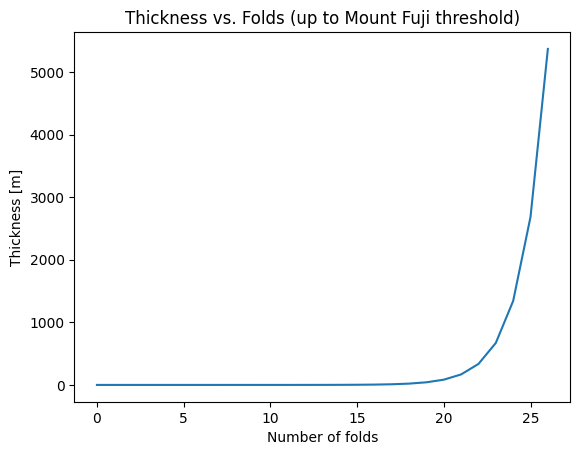

In [ ]:
# Build thickness list up to n_fuji
thickness_list = [T0]
current = T0
for _ in range(n_fuji):
    current *= 2
    thickness_list.append(current)

import matplotlib.pyplot as plt

plt.title("Thickness vs. Folds (up to Mount Fuji threshold)")
plt.xlabel("Number of folds")
plt.ylabel("Thickness [m]")
plt.plot(thickness_list)
plt.show()

## 7. Summary
This assignment demonstrates the ability to:
- Compute minimal folds for a target height using both iterative and formula-based approaches
- Implement a function to generalize the calculation for any target height and initial thickness
- Apply the paper-length formula to estimate feasibility
- Visualize exponential thickness growth to understand scale